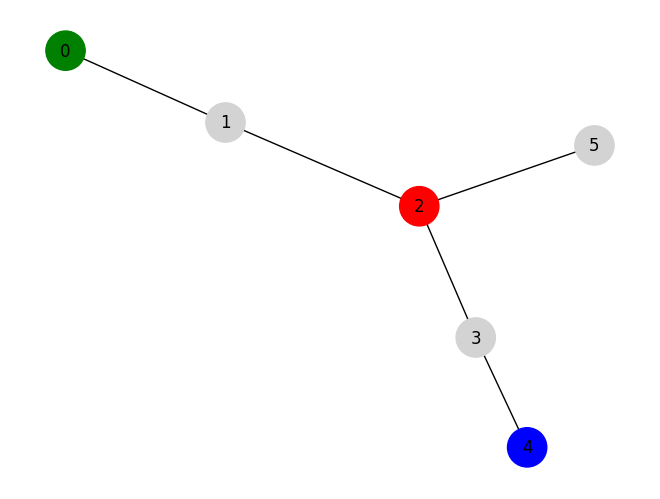

In [3]:
import networkx as nx
from matplotlib import pyplot as plt

G = nx.Graph() # Declare a graph object
v = 7 # Number of vertices
V = [i for i in range(v-1)] # Vertices
E = [(0,1), (1,2), (2,3), (3,4), (2,5)] # Edges
C = {"0": "1", "2":"0", "4":"2"} # Colored nodes
n = 3 # Number of colors

for v in V:
    G.add_node(v) # Add vertices to the graph
for e in E:
    G.add_edge(*e)

# Define a color map for the n colors
color_map = ['red', 'green', 'blue']  # Example colors for n=3

# Create a list of colors for each node
node_colors = []
for node in G.nodes():
    if str(node) in C:
        color_idx = int(C[str(node)])
        if 0 <= color_idx < n:
            node_colors.append(color_map[color_idx])
        else:
            node_colors.append('lightgray')  # Default for invalid color index
    else:
        node_colors.append('lightgray')  # Default for uncolored nodes

# Draw the graph with node colors
nx.draw(G, with_labels=True, node_color=node_colors,node_size=800)

/tmp/nix-shell-15736-0/ipykernel_16035/3927044234.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


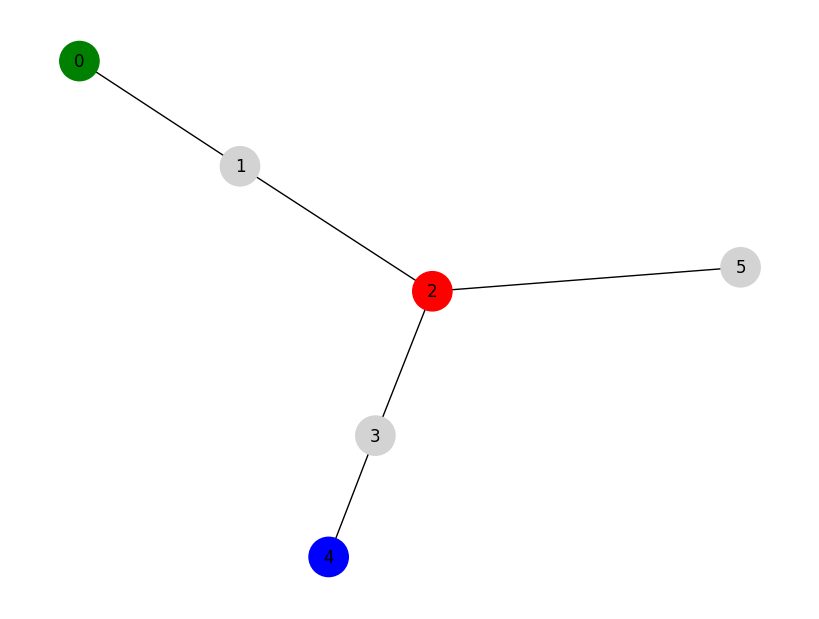

In [8]:
import networkx as nx
from matplotlib import pyplot as plt

def create_colored_graph(num_vertices, edges, colored_nodes, num_colors) -> nx.Graph:
    """
    Generate a graph with colored nodes.
    
    Parameters:
    -----------
    num_vertices : int
        Number of vertices in the graph
    edges : list of tuples
        List of edges as (source, target) tuples
    colored_nodes : dict
        Dictionary mapping node IDs (as strings) to color indices (as strings)
    num_colors : int
        Number of available colors
        
    Returns:
    --------
    G : networkx.Graph
        The generated graph with color attributes embedded in nodes
    """
    G = nx.Graph()  # Declare a graph object
    
    # Define a color map for the colors
    color_map = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
    # Ensure we have enough colors
    if num_colors > len(color_map):
        color_map = color_map * (num_colors // len(color_map) + 1)
    color_map = color_map[:num_colors]
    
    # Create vertices with color attributes
    for v in range(num_vertices):
        # Check if this node has a color assigned
        if str(v) in colored_nodes:
            color_idx = int(colored_nodes[str(v)])
            if 0 <= color_idx < num_colors:
                # Add node with color attribute directly
                G.add_node(v, color=color_map[color_idx], color_idx=color_idx)
            else:
                G.add_node(v, color='lightgray', color_idx=-1)
        else:
            G.add_node(v, color='lightgray', color_idx=-1)
    
    # Add edges
    for e in edges:
        G.add_edge(*e)
    
    return G

def draw_colored_graph(G, figsize=(8, 6), node_size=800):
    """
    Draw a graph with nodes colored according to their color attribute.
    
    Parameters:
    -----------
    G : networkx.Graph
        The graph to draw (should have 'color' attributes on nodes)
    figsize : tuple, optional
        Figure size as (width, height) in inches
    node_size : int, optional
        Size of the nodes in the visualization
    """
    # Extract node colors for drawing
    node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    
    # Draw the graph with node colors
    plt.figure(figsize=figsize)
    nx.draw(G, with_labels=True, node_color=node_colors, node_size=node_size)
    plt.tight_layout()

# Example usage:
v = 6  # Number of vertices
E = [(0,1), (1,2), (2,3), (3,4), (2,5)]  # Edges
C = {"0": "1", "2":"0", "4":"2"}  # Colored nodes
n = 3  # Number of colors

# Generate the graph
G = create_colored_graph(v, E, C, n)

# Draw the graph
draw_colored_graph(G)

/tmp/nix-shell-15736-0/ipykernel_16035/3927044234.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


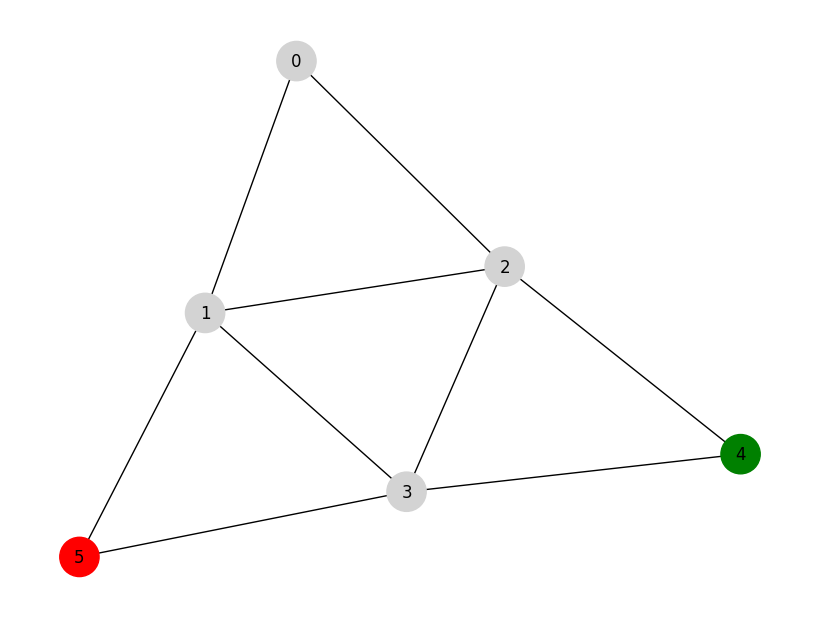

In [10]:
# Example usage:
v = 6  # Number of vertices
E = [(0,1), (0,2), (1,2), (1,3), (1,5), (2,3), (2,4), (3,4), (3,5)]  # Edges
C = {"4": "1", "5":"0"}  # Colored nodes
n = 4  # Number of colors

# Generate the graph
G = create_colored_graph(v, E, C, n)
# Draw the graph
draw_colored_graph(G)